In [1]:
from qutip import *
from numpy import pi
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def oracle(x,dim):
    array = [ ]
    if x>dim:
        return("dim error: dim should greater or equal to x")
    for i in range(dim):
        if i+1==x:
            array.append([1])
        else:
            array.append([0])
    return(array)

def diffusor_construct(s):
    #the input state should be ket
    sm = [ ]
    dim = s.shape[0]
    for i in range(dim):
        numi = s[i][0][0]
        sm.append([ ])
        for j in range(dim):
            numj = s[j][0][0]
            sm[i].append(2*np.conj(numi)*numj)
            if i == j:
                sm[i][j] = sm[i][j]-1
    return(sm)

In [38]:
w = 1 #Hamming weight
length = 7 #max is 7

R1 = [ ]
dim_R1 = 2**(length*w)
N1 = 1/np.sqrt(dim_R1)

for i in range(dim_R1):
    R1.append(Qobj(oracle(i+1,dim_R1)))

R2 = [ ]
dim_R2 = 2**(length*w)
N2 = 1/np.sqrt(dim_R2)

for i in range(dim_R2):
    R2.append(Qobj(oracle(i+1,dim_R2)))
    
index_range = range(2**(length*w))
target_position = []
for k in index_range:
    target_position.append(k*dim_R2 + k)

In [39]:
inversor = [ ]
for i in range(dim_R1*dim_R2):
    inversor.append([ ])
    for j in range(dim_R1*dim_R2):
        if i==j:
            if j in target_position:     #do the inversion on the well-constructed states in the direct product state
                inversor[i].append(-1)
            else:
                inversor[i].append(1)
        else:
            inversor[i].append(0)
inversor = Qobj(inversor)

R12 = 0
for i in range(dim_R1):
    for j in range(dim_R2):
        R12 = R12 + tensor(R1[i],R2[j])
R12 = N1*N2*R12
state_s = R12
diffusor = Qobj(diffusor_construct(state_s))
state_s.dims = [[state_s.dims[0][0]*state_s.dims[0][1]],[1]]

MemoryError: Unable to allocate 16.0 GiB for an array with shape (65536, 65536) and data type int32

In [ ]:
# main iteration
p1 = []
p2 = []

num_iteration = int((dim_R1+dim_R2)**(1/2))
for i in range(1,num_iteration+1):
    s = state_s
    for dummy in range(i):
        s = diffusor * inversor * s
    # state_s = diffusor * inversor * state_s
    p1.append(s[0][0][0]* np.conj(s[0][0][0]))
    p2.append(s[1][0][0]* np.conj(s[1][0][0]))

In [ ]:
p1

In [ ]:
p2

In [38]:
labels = ['$|0,0>$ ', '$|0,1>$' ]
width=0.35
prob = [p1,p2]

print(prob)

# fig, ax=plt.subplots()

# ax.bar(labels,prob,width,label='probability')
# ax.set_ylabel('Probability')
# ax.set_xlabel('State')
# ax.legend()

# plt.show()

[[(0.060082435607910156+0j)], [(0.00016117095947265625+0j)]]


In [8]:
# # main iteration
# p1 = []
# p2 = []

# for k in range(3):

#     #the searching state
#     R12 = 0
#     for i in range(16):
#         for j in range(32):
#             if [i,j] == target_set[i]:
#                 R12 = R12 + phase[k]*tensor(R1[j],R2[i])
#             else:
#                 R12 = R12 + tensor(R1[j],R2[i])
#     R12 = N1*N2*R12

#     ss= u_s * u_w * R12
#     dummy=2
#     for i in range(dummy):
#         ss = u_s * u_w *ss

#     p1.append(ss[0][0][0]* np.conj(ss[0][0][0]))
#     p2.append(ss[1][0][0]* np.conj(ss[1][0][0]))

Text(0, 0.5, 'Probability')

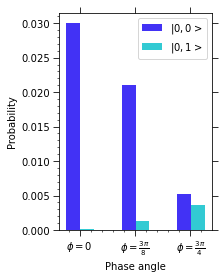

In [10]:
# Declaring the figure or the plot (y, x) or (width, height)
# plt.figure(figsize=[10, 10])
# Data to be plotted


plt.subplot(121)
x_axis = [100, 400, 700]

# Using numpy to group 3 different data with bars
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
X = np.arange(len(x_axis))

plt.bar(X, p1, color = '#4232F5', width = 0.25)
plt.bar(X + 0.25, p2, color = '#32CAD3', width = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['$|0,0>$', '$|0,1>$'])


plt.tick_params(length = 6 ,top = True, bottom = True, left = True, right= True)

# Overiding the x axis with the country names
plt.xticks([i + 0.115 for i in range(3)], [r'$\phi = 0$', r'$\phi = \frac{3\pi}{8}$', r'$\phi =\frac{3\pi}{4} $'])
plt.minorticks_on()

# Namimg the x and y axis
plt.xlabel('Phase angle')
plt.ylabel('Probability')
